<a href="https://colab.research.google.com/github/SanjayBukka/ad_recommendation_system/blob/main/Ad_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("marius2303/ad-click-prediction-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/marius2303/ad-click-prediction-dataset/versions/5


Load The DataSet i.e Ad_data


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('ad_data.csv')


In [ ]:
print(data.head())

     id full_name   age      gender device_type ad_position browsing_history  \
0   670   User670  22.0         NaN     Desktop         Top         Shopping   
1  3044  User3044   NaN        Male     Desktop         Top              NaN   
2  5912  User5912  41.0  Non-Binary         NaN        Side        Education   
3  5418  User5418  34.0        Male         NaN         NaN    Entertainment   
4  9452  User9452  39.0  Non-Binary         NaN         NaN     Social Media   

  time_of_day  click  
0   Afternoon      1  
1         NaN      1  
2       Night      1  
3     Evening      1  
4     Morning      0  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB
None


Checking for Missing Values


In [ ]:
print(data.isnull().sum())

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64


lets visualize missing data


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


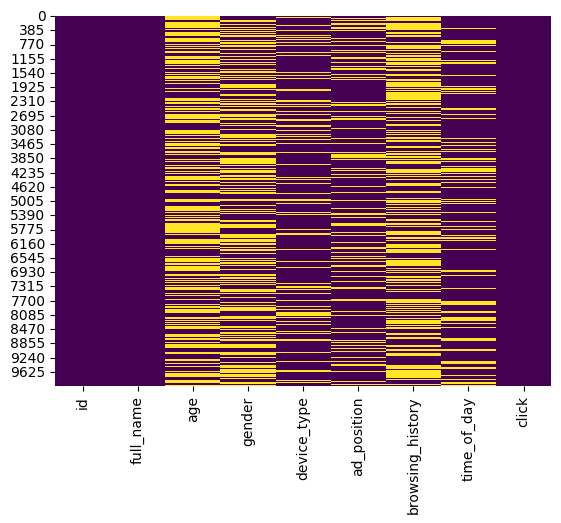

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

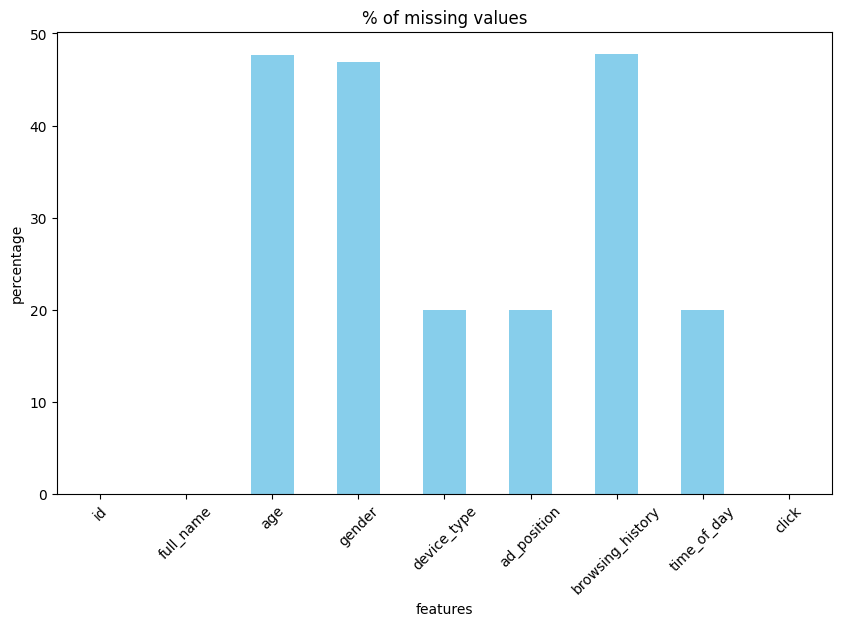

In [ ]:
missing_percent = (data.isnull().sum() / len(data)) * 100

plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar',color='skyblue')
plt.title("% of missing values")
plt.ylabel("percentage")
plt.xlabel("features")
plt.xticks(rotation=45)
plt.show

lets deal with missing values

In [ ]:
#for numeric data median
data['age'].fillna(data['age'].median(),inplace=True)

#categorical data
categorical_features=['gender','device_type','ad_position','browsing_history','time_of_day']

for feature in categorical_features:
  data[feature].fillna('Unknown', inplace=True)



<ipython-input-12-68e9d33c926c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(),inplace=True)
<ipython-input-12-68e9d33c926c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
print(data.isnull().sum())

id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64


In [ ]:
data.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,Unknown,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,39.5,Male,Desktop,Top,Unknown,Unknown,1
2,5912,User5912,41.0,Non-Binary,Unknown,Side,Education,Night,1
3,5418,User5418,34.0,Male,Unknown,Unknown,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,Unknown,Unknown,Social Media,Morning,0


lets apply one-hot encoding


In [ ]:
data = pd.get_dummies(data, columns=['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day'])
print(data.head())

     id full_name   age  click  gender_Female  gender_Male  gender_Non-Binary  \
0   670   User670  22.0      1          False        False              False   
1  3044  User3044  39.5      1          False         True              False   
2  5912  User5912  41.0      1          False        False               True   
3  5418  User5418  34.0      1          False         True              False   
4  9452  User9452  39.0      0          False        False               True   

   gender_Unknown  device_type_Desktop  device_type_Mobile  ...  \
0            True                 True               False  ...   
1           False                 True               False  ...   
2           False                False               False  ...   
3           False                False               False  ...   
4           False                False               False  ...   

   browsing_history_Entertainment  browsing_history_News  \
0                           False                 

In [ ]:
print(data.columns)

Index(['id', 'full_name', 'age', 'click', 'gender_Female', 'gender_Male',
       'gender_Non-Binary', 'gender_Unknown', 'device_type_Desktop',
       'device_type_Mobile', 'device_type_Tablet', 'device_type_Unknown',
       'ad_position_Bottom', 'ad_position_Side', 'ad_position_Top',
       'ad_position_Unknown', 'browsing_history_Education',
       'browsing_history_Entertainment', 'browsing_history_News',
       'browsing_history_Shopping', 'browsing_history_Social Media',
       'browsing_history_Unknown', 'time_of_day_Afternoon',
       'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night',
       'time_of_day_Unknown'],
      dtype='object')


In [ ]:
X = data.drop(['id', 'full_name', 'click'], axis=1)
y = data['click']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 8000
Testing set size: 2000


libraries for model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Logistic Regression

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 64.65%
Confusion Matrix:
[[   5  700]
 [   7 1288]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.01      0.01       705
           1       0.65      0.99      0.78      1295

    accuracy                           0.65      2000
   macro avg       0.53      0.50      0.40      2000
weighted avg       0.57      0.65      0.51      2000



try to improve accuracy

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("After SMOTE - class distribution:", y_train_resampled.value_counts())


After SMOTE - class distribution: click
0    5205
1    5205
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under Sampling to balance the classes
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
print("After Random Under Sampling - class distribution:", y_train_resampled.value_counts())

After Random Under Sampling - class distribution: click
0    2795
1    2795
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 53.75%
Confusion Matrix:
[[372 333]
 [592 703]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.53      0.45       705
           1       0.68      0.54      0.60      1295

    accuracy                           0.54      2000
   macro avg       0.53      0.54      0.52      2000
weighted avg       0.58      0.54      0.55      2000



finetune

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
}

# Initialize logistic regression model
log_reg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f"Accuracy with Best Hyperparameters: {accuracy_best * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(class_report_best)

Accuracy with Best Hyperparameters: 53.75%
Confusion Matrix:
[[372 333]
 [592 703]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.53      0.45       705
           1       0.68      0.54      0.60      1295

    accuracy                           0.54      2000
   macro avg       0.53      0.54      0.52      2000
weighted avg       0.58      0.54      0.55      2000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy with Random Forest: {accuracy_rf * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)


Accuracy with Random Forest: 65.10%
Confusion Matrix:
[[425 280]
 [418 877]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55       705
           1       0.76      0.68      0.72      1295

    accuracy                           0.65      2000
   macro avg       0.63      0.64      0.63      2000
weighted avg       0.67      0.65      0.66      2000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model performance
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f"Accuracy with Best Random Forest Model: {accuracy_best * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(class_report_best)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Accuracy with Best Random Forest Model: 66.30%
Confusion Matrix:
[[427 278]
 [396 899]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.61      0.56       705
           1       0.76      0.69      0.73      1295

    accuracy                           0.66      2000
   macro avg       0.64      0.65      0.64      2000
weighted avg       0.68      0.66      0.67      2000



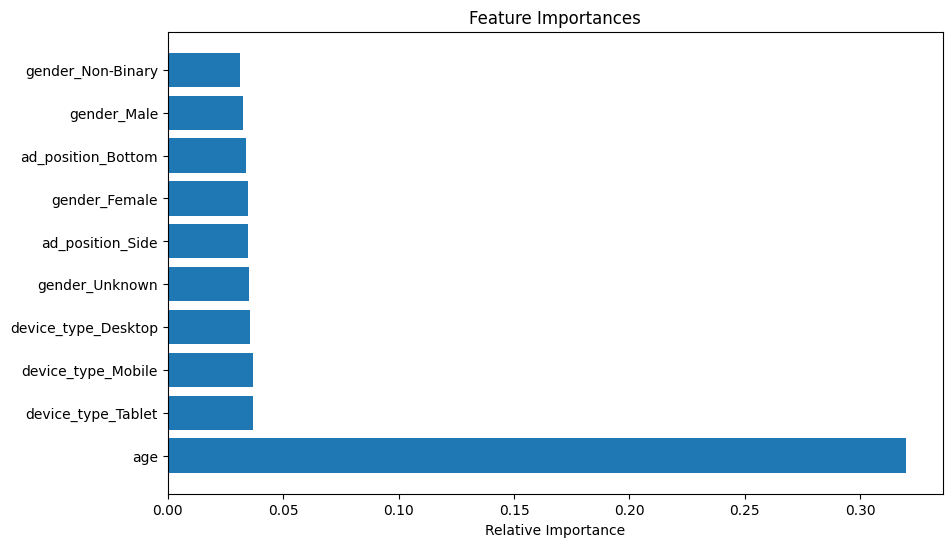

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = best_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(10), importances[indices[:10]], align='center')
plt.yticks(range(10), np.array(X_train.columns)[indices[:10]])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [ ]:
print(f"Accuracy with Random Forest: {accuracy_rf * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)

Accuracy with Random Forest: 94.55%
Confusion Matrix:
[[ 611   94]
 [  15 1280]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       705
           1       0.93      0.99      0.96      1295

    accuracy                           0.95      2000
   macro avg       0.95      0.93      0.94      2000
weighted avg       0.95      0.95      0.94      2000



taking user input to test the model

In [ ]:
user_data = pd.DataFrame({
    'age': [55],
    'gender': ['Female'],
    'device_type': ['Mobile'],
    'ad_position': ['Top'],
    'browsing_history': ['Shopping'],
    'time_of_day': ['Morning']
})

user_data_encoded = pd.get_dummies(user_data)

user_data_encoded = user_data_encoded.reindex(columns=X_train.columns, fill_value=0)

click_prediction = rf_model.predict(user_data_encoded)

if click_prediction[0] == 1:
    print("The user is likely to click on the ad. Recommend an ad!")
else:
    print("The user is unlikely to click on the ad. Consider a different recommendation.")

The user is unlikely to click on the ad. Consider a different recommendation.
